In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.5)
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# Quantum Gates on basis states

This file will use different gates on the baseis states:

$$
\vert 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix},
$$

and

$$
\vert 1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

This is how we will define the basis states in python:

In [2]:
# Define the basis states
ZERO_STATE = np.array([[1], [0]])
ONE_STATE = np.array([[0], [1]])

## Pauli Matrices

In quantum computing, the Pauli matrices (also known as Pauli spin matrices) are a set of three 2x2 matrices that are fundamental in quantum mechanics. They are:

- Pauli-X matrix ($\sigma_x$): $$\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$
- Pauli-Y matrix ($\sigma_y$): $$\sigma_y = \begin{bmatrix} 0 & -\imath \\ \imath & 0 \end{bmatrix}$$
- Pauli-Z matrix ($\sigma_z$): $$\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

Here is how we define a Python function using numpy to set up a one-qubit basis and apply the Pauli matrices to these basis states:

In [3]:
def apply_pauli_matrices():
    # Define the Pauli Matrices
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])

    # Apply the Pauli Matrices to the basis states
    zero_state_x = np.dot(sigma_x, ZERO_STATE)
    one_state_x = np.dot(sigma_x, ONE_STATE)

    zero_state_y = np.dot(sigma_y, ZERO_STATE)
    one_state_y = np.dot(sigma_y, ONE_STATE)

    zero_state_z = np.dot(sigma_z, ZERO_STATE)
    one_state_z = np.dot(sigma_z, ONE_STATE)

    # Print the resulting states
    print("Sigma-x applied to |0>:\n", zero_state_x)
    print("\n")
    print("Sigma-x applied to |1>:\n", one_state_x)
    print("\n")
    print("Sigma-y applied to |0>:\n", zero_state_y)
    print("\n")
    print("Sigma-y applied to |1>:\n", one_state_y)
    print("\n")
    print("Sigma-z applied to |0>:\n", zero_state_z)
    print("\n")
    print("Sigma-z applied to |1>:\n", one_state_z)

In [4]:
# Call the function
apply_pauli_matrices()

Sigma-x applied to |0>:
 [[0]
 [1]]


Sigma-x applied to |1>:
 [[1]
 [0]]


Sigma-y applied to |0>:
 [[0.+0.j]
 [0.+1.j]]


Sigma-y applied to |1>:
 [[0.-1.j]
 [0.+0.j]]


Sigma-z applied to |0>:
 [[1]
 [0]]


Sigma-z applied to |1>:
 [[ 0]
 [-1]]


This function first sets up the Pauli matrices and the basis states. Then it applies the Pauli matrices to the basis states using the `np.dot()` function from numpy, which performs matrix multiplication. The results are then printed.

## Hadamard and Phase gates

The Hadamard gate and Phase gate (also known as S gate) are fundamental gates in quantum computing. They act on single qubits and their matrix representations are:

- Hadamard ($\boldsymbol{H}$): 
    $$
    \boldsymbol{H}=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}
    $$
- Phase ($\boldsymbol{S}$): 
    $$
    \boldsymbol{S} = \begin{bmatrix} 1 & 0 \\ 0 & \imath\end{bmatrix}
    $$

The Hadamard and Phase can be defined in Python as:

In [5]:
# Define the Hadamard gates
HADAMARD = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])

# Define the Phase gates
PHASE = np.array([[1, 0], [0, 1j]])

Here is how we can define a Python function using numpy to apply these gates to the one-qubit basis states:

In [6]:
def apply_hadamard():

    # Apply the Hadamard gates to the basis states
    zero_state_h = np.dot(HADAMARD, ZERO_STATE)
    one_state_h = np.dot(HADAMARD, ONE_STATE)

    # Print the resulting states
    print("Hadamard applied to |0>:\n", zero_state_h)
    print("\n")
    print("Hadamard applied to |1>:\n", one_state_h)

In [7]:
def apply_phase():

    # Apply the Phase gates to the basis states
    zero_state_s = np.dot(PHASE, ZERO_STATE)
    one_state_s = np.dot(PHASE, ONE_STATE)

    # Print the resulting states
    print("Phase applied to |0>:\n", zero_state_s)
    print("\n")
    print("Phase applied to |1>:\n", one_state_s)

In [8]:
# Call the function
apply_hadamard()
print("\n")
apply_phase()

Hadamard applied to |0>:
 [[0.70710678]
 [0.70710678]]


Hadamard applied to |1>:
 [[ 0.70710678]
 [-0.70710678]]


Phase applied to |0>:
 [[1.+0.j]
 [0.+0.j]]


Phase applied to |1>:
 [[0.+0.j]
 [0.+1.j]]


## CNOT gate

The CNOT (or controlled NOT) gate is given by

$$
\begin{equation}
\text{CNOT}
=\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\end{equation}
$$

We can define the gate in Python like this:

In [9]:
# Define the CNOT gate
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

## Bell states

The Bell states are specific quantum states of two qubits that represent the simplest (and maximal) examples of quantum entanglement. The Bell states are:

$$
\vert \Phi^+\rangle = \frac{1}{\sqrt{2}}\left[\vert 00\rangle +\vert 11\rangle\right]=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 0 \\ 0 \\ 1\end{bmatrix},
$$

$$
\vert \Phi^-\rangle = \frac{1}{\sqrt{2}}\left[\vert 00\rangle -\vert 11\rangle\right]=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 0 \\ 0 \\ -1\end{bmatrix},
$$

$$
\vert \Psi^+\rangle = \frac{1}{\sqrt{2}}\left[\vert 10\rangle +\vert 01\rangle\right]=\frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 1 \\ 1 \\ 0\end{bmatrix},
$$

and

$$
\vert \Psi^-\rangle = \frac{1}{\sqrt{2}}\left[\vert 10\rangle -\vert 01\rangle\right]=\frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 1 \\ -1 \\ 0\end{bmatrix}.
$$

Here there are drawn as a quantum cicuit:

In [10]:
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')


def firstBellState():
    circuit = QuantumCircuit(q,c)

    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate

    return circuit.draw(output='mpl')

def secondBellState():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[0]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate

    return circuit.draw(output='mpl')

def thirdBellState():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[1]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate 
    circuit.cx(q[0],q[1]) # CNOT gate

    return circuit.draw(output='mpl')

def fourthBellState():
    circuit = QuantumCircuit(q,c)

    circuit.x(q[1]) # Pauli-X gate 
    circuit.h(q[0]) # Hadamard gate
    circuit.z(q[0]) # Pauli-Z gate
    circuit.z(q[1]) # Pauli-Z  gate 
    circuit.cx(q[0],q[1]) # CNOT gate

    return circuit.draw(output='mpl')

Creating first Bell State:



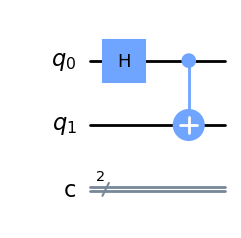

In [11]:
print("Creating first Bell State:\n")
firstBellState()


Creating second Bell State:



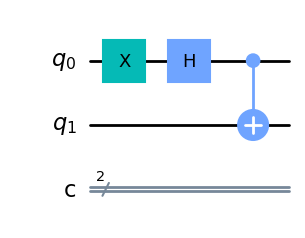

In [12]:
print("\nCreating second Bell State:\n")
secondBellState()


Creating third Bell State:



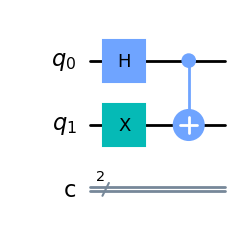

In [13]:
print("\nCreating third Bell State:\n")
thirdBellState()


Creating fourth Bell State:



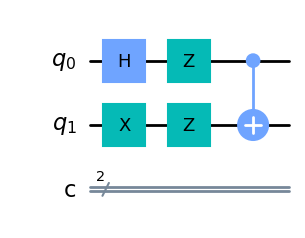

In [14]:
print("\nCreating fourth Bell State:\n")
fourthBellState()

In [15]:
PHI_PLUS = 1/np.sqrt(2) * np.array([[1], [0], [0], [1]])
PHI_MINUS = 1/np.sqrt(2) * np.array([[1], [0], [0], [-1]])

PSI_PLUS = 1/np.sqrt(2) * np.array([[0], [1], [1], [0]])
PSI_MINUS = 1/np.sqrt(2) * np.array([[0], [1], [-1], [0]])

Here is how we can define a Python function using numpy to apply a Hadamard gate and thereafter a CNOT gate on Bell state $\vert \Phi^+\rangle$:

In [16]:
def apply_hadamard_and_cnot():
    
    # Apply the Hadamard gate to the first qubit of |Φ+>
    phi_plus_h = np.kron(np.dot(HADAMARD, PHI_PLUS[:2]), PHI_PLUS[2:])

    # Apply the CNOT gate to the result
    final_state = np.dot(CNOT, phi_plus_h)

    # return the resulting state
    return final_state

In [17]:
# Call the function
print("Final state:\n", apply_hadamard_and_cnot())

Final state:
 [[0.        ]
 [0.35355339]
 [0.35355339]
 [0.        ]]


This function first sets up the Hadamard and CNOT gates, and the Bell state $\vert \Phi^+\rangle$. Then it applies the Hadamard gate to the first qubit of $\vert \Phi^+\rangle$ using `np.dot()` for the matrix multiplication and `np.kron()` for the Kronecker (tensor) product. The CNOT gate is then applied to the result. The final state is printed.

## Qubit measurements

Measurement in quantum computing refers to the process of obtaining classical information (such as 0 or 1) from a qubit. When a measurement is made on a qubit, it collapses to one of its basis states. In this case, since we're working with a 2-qubit system, the measurements are made on the computational basis states: |00>, |01>, |10>, |11>.

In the code below, we simulate measurements by using the probabilities given by the square magnitudes of the coefficients in front of the basis states. We do the simulation using numpy's random choice function which allows us to choose a state based on its probability. We then count the number of times each state is chosen over many trials to get the measurement probabilities.

In [18]:
# Define gates
Hadamard = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
CNOT = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

In [19]:
# Prepare initial state
initial_state = np.array([1, 0, 0, 0])

# Apply Hadamard to first qubit
state_after_Hadamard = np.kron(Hadamard, np.eye(2)).dot(initial_state)

# Apply CNOT
state_after_CNOT = CNOT.dot(state_after_Hadamard)

# Apply Hadamard to first qubit again
state_after_second_Hadamard = np.kron(Hadamard, np.eye(2)).dot(state_after_CNOT)

# Apply second CNOT
final_state = CNOT.dot(state_after_second_Hadamard)

In [20]:
# Perform "measurement" by squaring amplitudes
probabilities = np.abs(final_state)**2

# Simulate 1000 shots
shots = 1000
measurements = np.random.choice([0, 1, 2, 3], size=shots, p=probabilities)

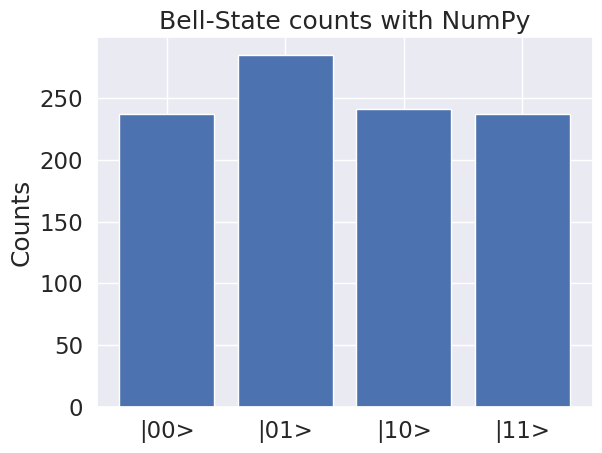

In [21]:
# Plot histogram
plt.hist(measurements, bins=4, range=[-0.5,3.5], align='mid', rwidth=0.8)
plt.xticks([0, 1, 2, 3], labels=['|00>', '|01>', '|10>', '|11>'])
plt.title('Bell-State counts with NumPy')
plt.ylabel("Counts")
plt.show()

In this code, we add a `measure_state` function which simulates the measurement of a 2-qubit state over a given number of trials. The `measure_state` function is then used in the `apply_hadamard_and_cnot` function to measure the final state after the Hadamard and CNOT gates have been applied. The average results of these measurements are then printed to the console.

## Comparing with Qiskit

Qiskit is a comprehensive open-source quantum computing library developed by IBM. Here I have recreated the code from above using Qiskit.

*Note: To create the Bell states with qiskit, I have used this guide: https://quantumcomputinguk.org/tutorials/introduction-to-bell-states*

In [22]:
# Define the quantum circuit
qc = QuantumCircuit(2, 2)

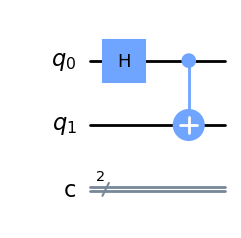

In [23]:
# Create the Bell state |Φ+> using a Hadamard gate and a CNOT gate
qc.h(0)
qc.cx(0, 1)
qc.draw(output='mpl')

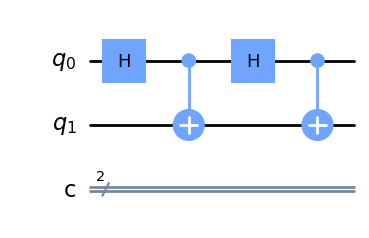

In [24]:
# Apply the Hadamard gate
qc.h(0)

# Apply the CNOT gate
qc.cx(0, 1)
qc.draw(output='mpl')

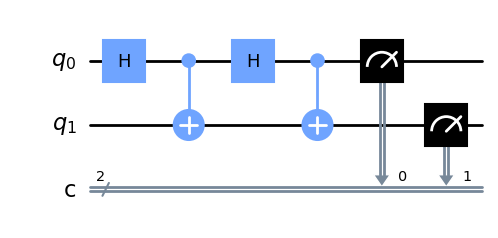

In [25]:
# Perform measurements on both qubits
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

In [26]:
# Execute the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()

In [27]:
# Get the measurement results
counts = result.get_counts(qc)

# Print the measurement results
print(counts)

{'11': 261, '10': 240, '00': 237, '01': 262}


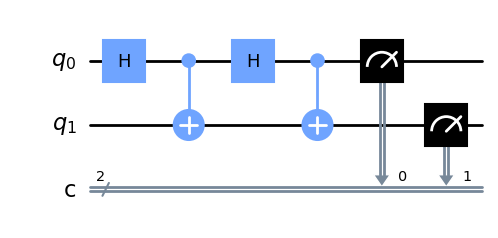

In [28]:
# Draw the circuit
qc.draw(output='mpl')

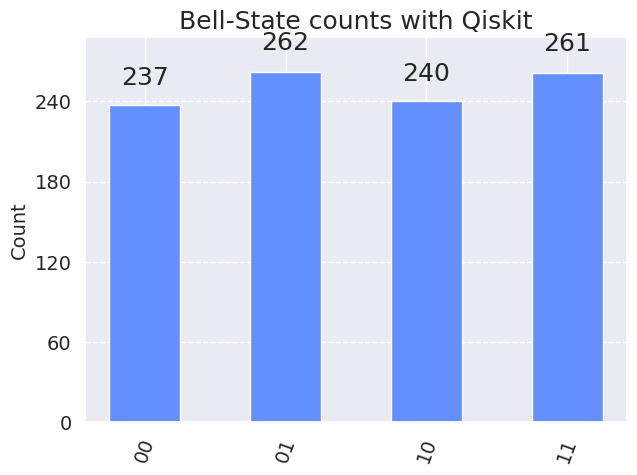

In [29]:
# Plot the measurement results
plot_histogram(counts, title='Bell-State counts with Qiskit')